In [37]:
import numpy as np
import pandas as pd

#시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

#통계 관련 패키지
import scipy as sp
import scipy.stats

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

# 분포 모형

## 지수 분포 - 다음 사건이 발생하기 까지의 대기 시간의 모형

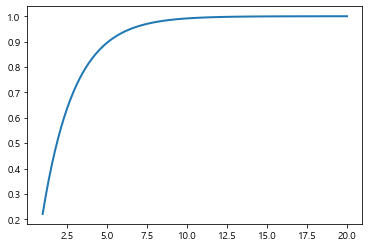

In [5]:
#실제 데이터에서는 단위 시간을 설정하고 표본에서 아래와 같은 값을 구해야 합니다.

#사건의 발생 횟수
loc = 0.5

#표준 편차
scale = 1.0 / 0.5

pd = sp.stats.expon(loc=loc, scale=scale)

x = np.linspace(1, 20, 100)

pdf = []
for num in x:
    result = pd.cdf(num)
    pdf.append(result)
    
plt.plot(x, pdf, linewidth=2.0)
plt.show()

## 베이불 분포

In [6]:
!pip install reliability

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47988 sha256=6d0dc9972f5cb28ab8c8413d7fdf46108cf390ae47150c272cfd263ec3b4756c
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\b6\86\a9\2c2d40e3c7d837ca251d7cb66f06a283c8679fa17421e8ddeb
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=9da27d9467c10e0f00b83486be9319fa45e563a3be616f457bc4601f444ac73d
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
  Created wheel for mplcursors: filename=mplcursors-0.5.1-py3-none-any.whl size=20815 sha256=ef3bb7747364850617102791d19feae93dd18fcfbc62daf851b927435e3e40ac
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\3d\92\c0\819b62369893148b59e1326e408f4c347ee8eff7b002d97633
Successfully built autograd autograd-gamma mplcursors


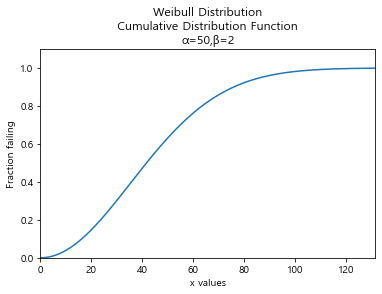

In [9]:
from reliability.Distributions import Weibull_Distribution

dist = Weibull_Distribution(alpha=50, beta=2)

dist.CDF()
plt.show()

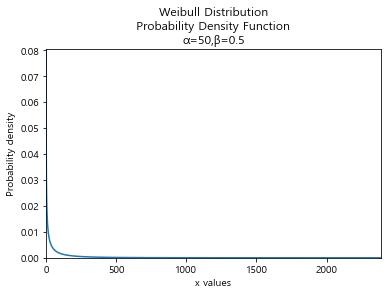

In [8]:
dist = Weibull_Distribution(alpha=50, beta=0.5)

dist.PDF()
plt.show()

# 표본 추출

## 파이썬의 random 모듈을 이용한 표본 추출

In [14]:
import random

li = [10, 20, 30, 40, 50]

#비복원 추출
print(random.sample(li, k=5))

#복원 추출
for i in range(5):
    print(li[random.randint(0, 4)], end='\t')

[30, 10, 20, 40, 50]
40	10	10	40	20	

## numpy를 이용한 가중치를 부여한 표본 추출

In [16]:
li = [10, 20, 30, 40, 50]
result = np.random.choice(li, 10, p = [0.5, 0.1, 0.1, 0.1, 0.2])
print(result)

[10 20 40 10 10 50 10 50 50 50]


## pandas를 이용한 표본 추출

In [20]:
from pandas import DataFrame
ar = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
df = DataFrame(ar)
print(df)

   0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11


In [21]:
df.sample()

,0,1,2
1,3,4,5


In [22]:
df.sample(n=3)

,0,1,2
0,0,1,2
2,6,7,8
1,3,4,5


In [24]:
df.sample(n=3, replace=True, weights=[0.7, 0.2, 0.1, 0.0])

,0,1,2
0,0,1,2
0,0,1,2
2,6,7,8


## sklearn 을 이용한 표본 추출

In [25]:
from sklearn.model_selection import train_test_split

#데이터 생성 - 독립 변수
X = np.arange(20).reshape(10, 2)
print(X)


#데이터 생성 - 종속 변수
y = np.arange(10)
print(y)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[0 1 2 3 4 5 6 7 8 9]


In [27]:
# 순차적으로 훈련 데이터 와 테스트 데이터를 6:4의 비율로 추출
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.4,
                                                   shuffle=False,
                                                   random_state=42)

print(X_train)
print()
print(X_test)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]

[[12 13]
 [14 15]
 [16 17]
 [18 19]]


In [28]:
# 랜덤하게 훈련 데이터 와 테스트 데이터를 6:4의 비율로 추출
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.4,
                                                   shuffle=True,
                                                   random_state=42)

print(X_train)
print()
print(X_test)

[[14 15]
 [ 4  5]
 [18 19]
 [ 8  9]
 [ 6  7]
 [12 13]]

[[16 17]
 [ 2  3]
 [10 11]
 [ 0  1]]


## 층화 추출

In [31]:
X = np.arange(30).reshape(15, 2)
y = np.arange(15)
grp = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

print(X)
print(y)
print(grp)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### 층화 무작위 추출

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                              test_size=0.2,
                                              shuffle=True,
                                              stratify=grp,
                                              random_state=1004)
print(X_train)

[[12 13]
 [ 8  9]
 [28 29]
 [ 0  1]
 [10 11]
 [ 6  7]
 [ 2  3]
 [18 19]
 [20 21]
 [22 23]
 [26 27]
 [14 15]]


In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#데이터 생성
for train_idx, test_idx in split.split(X, grp):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    
print(X_train)

[[12 13]
 [14 15]
 [ 2  3]
 [20 21]
 [10 11]
 [ 0  1]
 [ 8  9]
 [16 17]
 [28 29]
 [ 4  5]
 [22 23]
 [26 27]]


## 부트스트래핑 - 재표본 추출

In [39]:
#데이터 가져오기
df = pd.read_csv('./data/coffee_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB


In [40]:
# 데이터 200개를 샘플링
df_sample = df.sample(200)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 307 to 2096
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [43]:
#커피를 마시는 사람과 그렇지 않은 사람의 키의 평균을 부트스트래핑
#10000번 수행
iterationNum = 10000

diffHeightList = []

for _ in range(iterationNum):
    #샘플 데이터에서 복원 추출
    bootSample = df_sample.sample(200, replace=True)
    #커피를 마시지 않는 사람의 평균 키
    nonCoffeeHeightMean = 
        bootSample[bootSample['drinks_coffee'] == False].height.mean()
    #커피를 마시는 사람의 평균 키
    coffeeHeightMean = 
        bootSample[bootSample['drinks_coffee'] == True].height.mean()
    
    #평균 차이를 저장
    diff = nonCoffeeHeightMean - coffeeHeightMean
    diffHeightList.append(diff)

#신뢰수준 99%로 구간을 생성
print(np.percentile(diffHeightList, 0.5), 
      np.percentile(diffHeightList, 99.5))

-3.021805161077624 -0.6184840394475599


# 추론 통계

## 확률 분포의 추정

### 모멘트 추정을 이용한 모수 추정

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


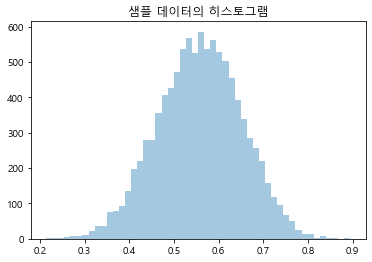

In [44]:
#베타 분포를 이용한 샘플 데이터 생성 - 모수는 15 와 12
x = sp.stats.beta(15, 12).rvs(10000)

#데이터의 히스토그램 출력
sns.distplot(x, kde=False, norm_hist=False)
plt.title("샘플 데이터의 히스토그램")
plt.show()

In [45]:
#베타 분포의 모수를 구해주는 함수
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    
    return a, b

#샘플 데이터의 모수를 출력 - 샘플 데이터를 생성할 때 설정한 모수 와 거의 유사
params = estimate_beta(x)
print(params)

(15.183785141782575, 12.06540543225288)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


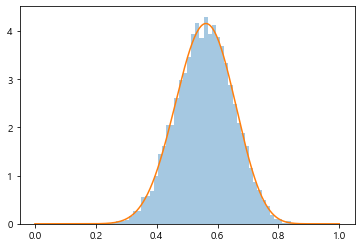

In [48]:
#샘플 데이터의 히스토그램 과 확률 분포 모형을 비교
xx = np.linspace(0,1, 1000)
sns.distplot(x, kde=False, norm_hist=True)

#베타분포 곡선 그리기
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


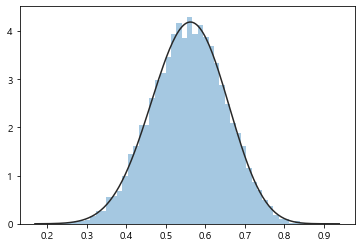

In [51]:
#샘플 데이터의 히스토그램 과 확률 분포 모형을 비교
xx = np.linspace(0,1, 1000)
sns.distplot(x, kde=False, norm_hist=True, fit=sp.stats.beta)

plt.show()

### 최대 가능도 추정법

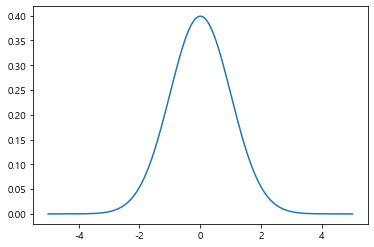

In [54]:
#정규 분포의 가능도 함수
def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.plot(mus, likelihood_mu)
plt.show()